In [1]:
# uncomment below line of code if you want to calculate features and save dataframe
# this script prints the path at which dataframe with calculated features is saved.
# train.py calls the DataGenerator class to 

#%run ./train.py WMT original

# this notebook was trained on cloud compute. So use your own paths

In [20]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
#FOR REPRODISIBILITY

In [22]:
import pandas as pd
import pickle 
import numpy as np
from tqdm import tqdm_notebook as tqdm
from IPython.core.interactiveshell import InteractiveShell

np.random.seed(2)
# company_code = 'WMT'
# strategy_type = 'original'
# use the path printed in above output cell after running stock_cnn.py. It's in below format
# df = pd.read_csv("E:/Host/Data/Bees/From/stock_cnn_blog_pub/stock_history/WMT/"+company_code+".csv")
# df['labels'] = df['labels'].astype(np.int8)
# if 'dividend_amount' in df.columns:
#     df.drop(columns=['dividend_amount', 'split_coefficient'], inplace=True)
# df = pd.read_csv('E:/Host/Data/Bees/Finance_ML/day.csv', decimal='.', sep = ',', encoding='latin-1')
# display(df.head())
# list(df)

In [15]:
#%run ./labeling.ipynb

In [16]:
#a, b = create_labels(df1.iloc[:200,:], 'close')

Calculating labels


C:\Users\afecn\anaconda3.1\lib\site-packages\ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


In [19]:
a

array([nan, nan, nan, nan, nan,  2.,  2.,  2.,  1.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  0.,  2.,  2.,  1.,  2.,  2.,  2.,  2.,
        0.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  0.,  2.,  2.,  1.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  0.,  2.,  2.,  2.,  1.,  2.,
        2.,  2.,  2.,  2.,  2.,  0.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,
        2.,  2.,  2.,  2.,  2.,  2.,  1.,  2.,  2.,  2.,  2.,  0.,  2.,
        1.,  2.,  2.,  2.,  2.,  2.,  0.,  2.,  2.,  2.,  1.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  0.,  2.,  2.,  2.,  2.,  1.,  2.,
        2.,  0.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  2.,  2.,  0.,
        2.,  2.,  2.,  2.,  2.,  1.,  2.,  2.,  2.,  2.,  2.,  0.,  2.,
        2.,  2.,  2.,  2.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  2.,  2.,  0.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  1.,  2.,  2.,  2.,  0.,  2.,  2

In [2]:
# ГОТОВИМ ТРАЙН И ТЕСТ ИЗ TALIB С ЗАГРУЗКИ ДО КОНЦА
df1 = pd.read_csv("E:/Host/Data/Bees/finance_ML/df3.csv")

#ДОБАВИЛ +/-И ЦЕНУ
return_ = np.array((df1['close'].shift(-1)/df1['close'].shift(0)-1)*100)
pl_mi   = np.array(np.where(return_ > 1, 1, np.where(return_ < -1, 2, 0)))
price   = np.array(df1['close'])
df1[0] = pl_mi
df1[1] = price
df1[2] = return_
#СГРУПИРОВАЛИ ПО СИМБОЛАМ И РАЗБИЛИ И СНОВА СОБРАЛИ НА ТЕСТ И ТРАЙН
train_df = pd.DataFrame()
test_df = pd.DataFrame()
for yy in ['GAZP', 'GMKN', 'LKOH', 'ROSN', 'SBER', 'SBERP', 'VTBR']:
    
    df_f = df1[df1['symbol'] == yy]
 #   display(df_f)
    df_f_train = df_f.iloc[:int(len(df_f)*0.9), :]
    df_f_test  = df_f.iloc[int(len(df_f)*0.9):, :]
  #  print('train')
  #  display(df_f_train)
  #  print('test')
  #  display(df_f_test)
  #  print('next')
    train_df = train_df.append(df_f_train)
    test_df  = test_df.append(df_f_test)
#display(train_df)
#display(test_df)
# СКОМПОНОВАЛИ ПРАВИЛЬНЫЕ СТОЛБЦЫ
train_df = train_df[[0,1,2] + list(train_df.columns[8:-4])]
test_df  = test_df [[0,1,2]  + list(test_df.columns[8:-4])]
#print('result')
display(train_df.shape)
display(test_df.shape)

C:\Users\afecn\anaconda3.1\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
C:\Users\afecn\anaconda3.1\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  


(21123, 292)

(2352, 292)

In [130]:
%%time

# УРАВНИВАЕМ ВЫБОРКУ 1 2 3

l0_train = train_df.loc[train_df[0] == 0]
l1_train = train_df.loc[train_df[0] == 1]
l2_train = train_df.loc[train_df[0] == 2]
l0_size = l0_train.shape[0]
l1_size = l1_train.shape[0]
l2_size = l2_train.shape[0]
#l0_l1_ratio = int((l0_size//l1_size)/4)
#l0_l2_ratio = int((l0_size//l2_size)/4)

l0_l1_ratio = (l0_size//l1_size)
l0_l2_ratio = (l0_size//l2_size)
print("Before")
print("l0_size:",l0_size,"l1_size:", l1_size,"l2_size:",l2_size)
print("l0_l1_ratio:",l0_l1_ratio,"l0_l2_ratio:", l0_l2_ratio)

l1_new = pd.DataFrame()
l2_new = pd.DataFrame()
for idx, row in train_df.iterrows():
    if row[0] == 1:
        for i in range(l0_l1_ratio):
            l1_new = l1_new.append(row)
    if row[0] == 2:
        for i in range(l0_l2_ratio):
            l2_new = l2_new.append(row)

train_df = train_df.append(l1_new)
train_df = train_df.append(l2_new)



########################################################
l0_train = train_df.loc[train_df[0] == 0]
l1_train = train_df.loc[train_df[0] == 1]
l2_train = train_df.loc[train_df[0] == 2]
l0_size = l0_train.shape[0]
l1_size = l1_train.shape[0]
l2_size = l2_train.shape[0]
#l0_l1_ratio = int((l0_size//l1_size)/4)
#l0_l2_ratio = int((l0_size//l2_size)/4)

l0_l1_ratio = (l0_size//l1_size)
l0_l2_ratio = (l0_size//l2_size)
print("After")
print("l0_size:",l0_size,"l1_size:", l1_size,"l2_size:",l2_size)
print("l0_l1_ratio:",l0_l1_ratio,"l0_l2_ratio:", l0_l2_ratio)

######################################################


train_df.reset_index(drop=True, inplace=True)
test_df.reset_index (drop=True, inplace=True)

print("train_df size: ", train_df.shape)
#print(train_df.columns)


Before
l0_size: 13202 l1_size: 4108 l2_size: 3813
l0_l1_ratio: 3 l0_l2_ratio: 3
After
l0_size: 13202 l1_size: 16432 l2_size: 15252
l0_l1_ratio: 0 l0_l2_ratio: 0
train_df size:  (44886, 292)
Wall time: 3min 27s


In [138]:
test_df.iloc[:, :]

,0,1,2,ADX_2,ADX_3,ADX_4,ADX_5,ADX_10,ADX_28,ADXR_2,...,STOCHRSI_fastk,STOCHRSI_fastd,HT_PHASOR_inphase,HT_PHASOR_quadrature,HT_SINE_sine,HT_SINE_leadsine,BBANDS_upperband,BBANDS_middleband,BBANDS_lowerband,MAMA_mama
0,0,152.290000,-0.768271,0.371073,-0.066952,-0.338502,-0.500276,-0.706512,-0.821677,0.190326,...,-1.000000,-0.699634,-0.069607,-0.119593,0.832500,0.196912,-0.986712,-0.986225,-0.986209,-0.986027
1,0,151.120000,-1.078613,-0.100182,-0.185424,-0.373054,-0.505883,-0.695382,-0.815928,0.100027,...,-1.000000,-1.000000,-0.069759,-0.120132,0.268443,-0.491335,-0.986741,-0.986303,-0.986339,-0.986041
2,0,149.490000,0.327781,0.169315,-0.042980,-0.259197,-0.411487,-0.651949,-0.803525,-0.005004,...,-1.000000,-1.000000,-0.070006,-0.120292,-0.655682,-0.997529,-0.986855,-0.986421,-0.986456,-0.986062
3,0,149.980000,-0.246700,0.339138,0.070392,-0.161373,-0.326827,-0.609483,-0.790821,0.223696,...,-0.419991,-0.806664,-0.070280,-0.120628,-0.999582,-0.727266,-0.987073,-0.986517,-0.986415,-0.986080
4,1,149.610000,3.288550,-0.239444,-0.253096,-0.299701,-0.389475,-0.603290,-0.783361,0.010905,...,-0.689334,-0.703108,-0.070937,-0.120661,-0.919840,-0.373031,-0.987133,-0.986565,-0.986448,-0.986264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347,0,0.036720,0.095316,0.435219,-0.014808,-0.179933,-0.247614,-0.294007,-0.637749,0.311652,...,-1.000000,-1.000000,-0.070418,-0.119731,-0.563538,-0.982615,-0.999998,-0.999998,-0.999998,-0.999998
2348,0,0.036755,0.476126,0.548040,0.072608,-0.150330,-0.256614,-0.349153,-0.657346,0.470870,...,-0.983100,-0.994367,-0.070418,-0.119730,-0.670690,-0.998737,-0.999998,-0.999998,-0.999998,-0.999999
2349,1,0.036930,2.030869,-0.304551,-0.176461,-0.278979,-0.352487,-0.419774,-0.672588,0.085761,...,-0.744532,-0.909211,-0.070418,-0.119731,-0.764096,-0.996454,-0.999998,-0.999998,-0.999998,-0.999999
2350,0,0.037680,0.132696,-0.353327,-0.512141,-0.463196,-0.481565,-0.495838,-0.684733,-0.383471,...,0.986753,-0.246960,-0.070418,-0.119732,-0.888286,-0.952881,-0.999998,-0.999998,-0.999998,-0.999999


(2352, 291)


Split data into Training, Validation and Test

In [7]:
#ВТОРОЙ ПЕРХОДНИЧОК ЧЕРЕХ SPLIT
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from collections import Counter

list_features = list(df1.iloc[:, 2:291].columns)
print('Total number of features', len(list_features))
#x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 2:291].values, df['labels'].values, train_size=0.8, 
#                                                    test_size=0.2, random_state=2, shuffle=True, stratify=df['labels'].values)

# smote = RandomOverSampler(random_state=42, sampling_strategy='not majority')
# x_train, y_train = smote.fit_resample(x_train, y_train)
# print('Resampled dataset shape %s' % Counter(y_train))


train_split = 0.85

print('train_split =',train_split)
x_train, x_cv, y_train, y_cv = train_test_split(train_df.iloc[:, 1:], train_df.iloc[:, 0], train_size=train_split, 
                                                random_state=2, shuffle=True,  #убрал
                                                stratify=train_df.iloc[:, 0])


x_main = x_train.copy()
print("Shape of x, y train/cv/test {} {} {} {} {} {}".format
      (x_train.shape, y_train.shape, x_cv.shape, y_cv.shape, x_test.shape, y_test.shape))

Total number of features 289
train_split = 0.85
Shape of x, y train/cv/test (17954, 291) (17954,) (3169, 291) (3169,) (2352, 291) (2352,)


Out of total 441+ features select top 'N' features (let's include base features like close, adjusted_close etc)

In [8]:
num_features = 289  # should be a perfect square
selection_method = 'all'
topk = 320 if selection_method == 'all' else num_features
# if train_split >= 0.8:
#     topk = 400
# else:
#     topk = 300

In [12]:
%%time
from operator import itemgetter
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

if selection_method == 'anova' or selection_method == 'all':
    select_k_best = SelectKBest(f_classif, k=topk)
    if selection_method != 'all':
        x_train = select_k_best.fit_transform(x_main, y_train)
        x_cv = select_k_best.transform(x_cv)
        x_test = select_k_best.transform(x_test)
    else:
        select_k_best.fit(x_main, y_train)
    
    selected_features_anova = itemgetter(*select_k_best.get_support(indices=True))(list_features)
    print(selected_features_anova)
    print(select_k_best.get_support(indices=True))
    print("****************************************")
    
if selection_method == 'mutual_info' or selection_method == 'all':
    select_k_best = SelectKBest(mutual_info_classif, k=topk)
    if selection_method != 'all':
        x_train = select_k_best.fit_transform(x_main, y_train)
        x_cv = select_k_best.transform(x_cv)
        x_test = select_k_best.transform(x_test)
    else:
        select_k_best.fit(x_main, y_train)

    selected_features_mic = itemgetter(*select_k_best.get_support(indices=True))(list_features)
    print(len(selected_features_mic), selected_features_mic)
    print(select_k_best.get_support(indices=True))

ValueError: k should be >=0, <= n_features = 289; got 320. Use k='all' to return all features.

In [7]:
if selection_method == 'all':
    common = list(set(selected_features_anova).intersection(selected_features_mic))
    print("common selected featues", len(common), common)
    if len(common) < num_features:
        raise Exception('number of common features found {} < {} required features. Increase "topk variable"'.format(len(common), num_features))
    feat_idx = []
    for c in common:
        feat_idx.append(list_features.index(c))
    feat_idx = sorted(feat_idx[0:225])
    print(feat_idx)

NameError: name 'selected_features_anova' is not defined

In [8]:
if selection_method == 'all':
    x_train = x_train[:, feat_idx]
    x_cv = x_cv[:, feat_idx]
    x_test = x_test[:, feat_idx]

print("Shape of x, y train/cv/test {} {} {} {} {} {}".format(x_train.shape, 
                                                             y_train.shape, x_cv.shape, y_cv.shape, x_test.shape, y_test.shape))

NameError: name 'feat_idx' is not defined

In [40]:
_labels, _counts = np.unique(y_train, return_counts=True)
print(
    "percentage of class 0 = {}, class 1 = {}, class 2 = {}".
format(
    _counts[0]/len(y_train) * 100, _counts[1]/len(y_train) * 100, _counts[2]/len(y_train) * 100
)
)

percentage of class 0 = 28.216204825624274, class 1 = 37.063182664278436, class 2 = 34.72061251009729


In [26]:
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

def get_sample_weights(y):
    """
    calculate the sample weights based on class weights. Used for models with
    imbalanced data and one hot encoding prediction.

    params:
        y: class labels as integers
    """

    y = y.astype(int)  # compute_class_weight needs int labels
    class_weights = compute_class_weight('balanced', np.unique(y), y)
    
    print("real class weights are {}".format(class_weights), np.unique(y))
    print("value_counts", np.unique(y, return_counts=True))
    sample_weights = y.copy().astype(float)
    for i in np.unique(y):
        sample_weights[sample_weights == i] = class_weights[i]  # if i == 2 else 0.8 * class_weights[i]
        # sample_weights = np.where(sample_weights == i, class_weights[int(i)], y_)

    return sample_weights

def reshape_as_image(x, img_width, img_height):
    x_temp = np.zeros((len(x), img_height, img_width))
    for i in range(x.shape[0]):
        # print(type(x), type(x_temp), x.shape)
        x_temp[i] = np.reshape(x[i], (img_height, img_width))

    return x_temp

def f1_weighted(y_true, y_pred):
    y_true_class = tf.math.argmax(y_true, axis=1, output_type=tf.dtypes.int32)
    y_pred_class = tf.math.argmax(y_pred, axis=1, output_type=tf.dtypes.int32)
    conf_mat = tf.math.confusion_matrix(y_true_class, y_pred_class)  # can use conf_mat[0, :], tf.slice()
    # precision = TP/TP+FP, recall = TP/TP+FN
    rows, cols = conf_mat.get_shape()
    size = y_true_class.get_shape()[0]
    precision = tf.constant([0, 0, 0])  # change this to use rows/cols as size
    recall = tf.constant([0, 0, 0])
    class_counts = tf.constant([0, 0, 0])

    def get_precision(i, conf_mat):
        print("prec check", conf_mat, conf_mat[i, i], tf.reduce_sum(conf_mat[:, i]))
        precision[i].assign(conf_mat[i, i] / tf.reduce_sum(conf_mat[:, i]))
        recall[i].assign(conf_mat[i, i] / tf.reduce_sum(conf_mat[i, :]))
        tf.add(i, 1)
        return i, conf_mat, precision, recall

    def tf_count(i):
        elements_equal_to_value = tf.equal(y_true_class, i)
        as_ints = tf.cast(elements_equal_to_value, tf.int32)
        count = tf.reduce_sum(as_ints)
        class_counts[i].assign(count)
        tf.add(i, 1)
        return count

    def condition(i, conf_mat):
        return tf.less(i, 3)

    i = tf.constant(3)
    i, conf_mat = tf.while_loop(condition, get_precision, [i, conf_mat])

    i = tf.constant(3)
    c = lambda i: tf.less(i, 3)
    b = tf_count(i)
    tf.while_loop(c, b, [i])

    weights = tf.math.divide(class_counts, size)
    numerators = tf.math.multiply(tf.math.multiply(precision, recall), tf.constant(2))
    denominators = tf.math.add(precision, recall)
    f1s = tf.math.divide(numerators, denominators)
    weighted_f1 = tf.reduce_sum(f.math.multiply(f1s, weights))
    return weighted_f1

def f1_metric(y_true, y_pred):
    """
    this calculates precision & recall 
    """

    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))  # mistake: y_pred of 0.3 is also considered 1
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    # y_true_class = tf.math.argmax(y_true, axis=1, output_type=tf.dtypes.int32)
    # y_pred_class = tf.math.argmax(y_pred, axis=1, output_type=tf.dtypes.int32)
    # conf_mat = tf.math.confusion_matrix(y_true_class, y_pred_class)
    # tf.Print(conf_mat, [conf_mat], "confusion_matrix")

    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

get_custom_objects().update({"f1_metric": f1_metric, "f1_weighted": f1_weighted})

In [153]:
sample_weights = get_sample_weights(y_train)
print("Test sample_weights")
rand_idx = np.random.choice(y_train.index, 30) ## ПОДПРАВИЛ
#print(y_train[rand_idx])

real class weights are [1.13327987 0.91055106 0.98099866] [0 1 2]
value_counts (array([0, 1, 2]), array([11222, 13967, 12964], dtype=int64))
Test sample_weights


In [10]:
#хер знает чего нерботает
# dim = int(np.sqrt(num_features))
# x_train = reshape_as_image(x_train, dim, dim)
# x_cv = reshape_as_image(x_cv, dim, dim)
# x_test = reshape_as_image(x_test, dim, dim)
# # adding a 1-dim for channels (3)
# x_train = np.stack((x_train,) * 3, axis=-1)
# x_test = np.stack((x_test,) * 3, axis=-1)
# x_cv = np.stack((x_cv,) * 3, axis=-1)
# print("final shape of x, y train/test {} {} {} {}".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))
dim = 17
#заменил на простые картинки
x_train_i   = np.array(x_train.iloc[:, 2:]).reshape(x_train.shape[0], dim, dim,1)
display(x_train_i.shape)
x_cv_i      = np.array(x_cv.iloc[:, 2:]).reshape(x_cv.shape[0], dim, dim,1)
x_test_i    = np.array(x_test.iloc[:, 2:]).reshape(x_test.shape[0], dim, dim,1)

(17954, 17, 17, 1)

In [11]:
#ЧЕ ТО ТАМ ДЕЛАЛИ. ТИПО ДОБАВЛ\ЛИ СТОЛБЦЫ КАТЕГОРИАЛЬНЫЕ, НО ПО ФАКТУ НИЧЕГО (ИСПРАВИЛ ТЕПЕРЬ ДЕЛАЕМ)
from sklearn.preprocessing import OneHotEncoder
one_hot_enc = OneHotEncoder()  # , categories='auto'
y_train = one_hot_enc.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
print("y_train",y_train.shape)
y_cv    = one_hot_enc.fit_transform(np.array(y_cv).reshape(-1, 1)).toarray()
y_test  = one_hot_enc.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

y_train (17954, 3)


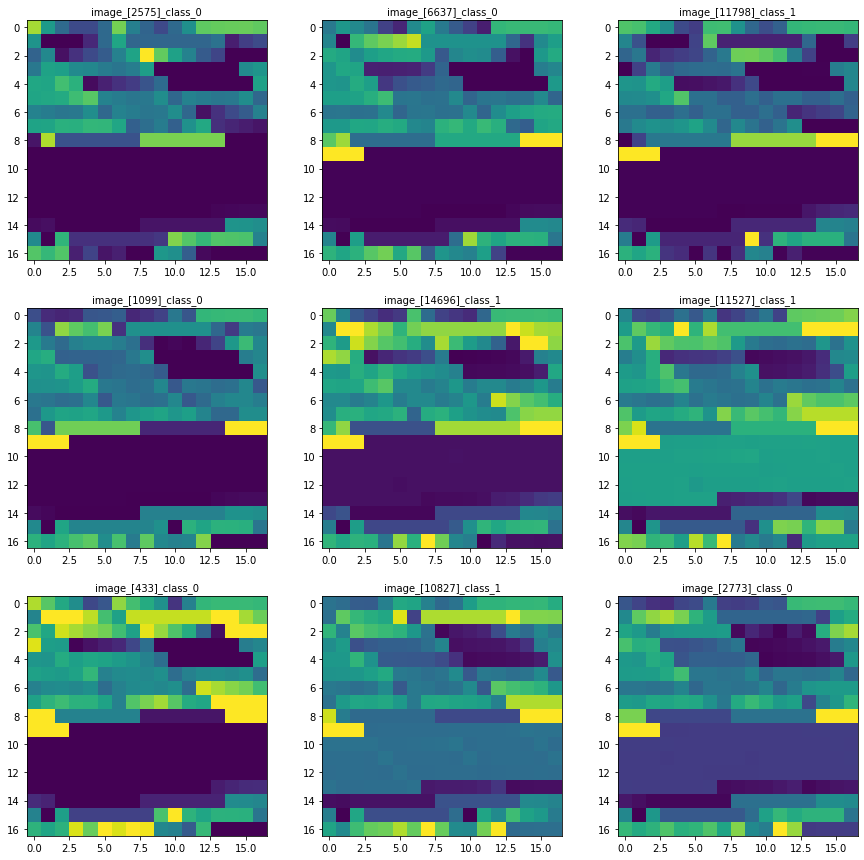

In [12]:
#НАДО ЗАПОМНИТЬ ЛУЧШЕ ЧЕМ ax, fig = and ax[0,1] with 2 sycles
from matplotlib import pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(15, 15))
columns = rows = 3
for i in range(1, columns*rows +1):
    index = [np.random.randint(len(x_train_i))]
    img = x_train_i[index]
    fig.add_subplot(rows, columns, i)
    plt.title('image_'+str(index)+'_class_'+str(np.argmax(y_train[index])), fontsize=10)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.imshow(img.reshape(17,17))
plt.show()

In [13]:
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, LeakyReLU
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger, Callback
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2, l1, l1_l2
from tensorflow.keras.initializers import RandomUniform, RandomNormal
from tensorflow.keras.models import load_model
from tensorflow.keras import regularizers

params = {'batch_size': 80, 
          'conv2d_layers': {'conv2d_do_1': 0.2, 'conv2d_filters_1': 32, 'conv2d_kernel_size_1': 3, 'conv2d_mp_1': 0, 
                                               'conv2d_strides_1': 1, 'kernel_regularizer_1': 0.0, 'conv2d_do_2': 0.3, 
                                               'conv2d_filters_2': 64, 'conv2d_kernel_size_2': 3, 'conv2d_mp_2': 2, 'conv2d_strides_2': 1, 
                                               'kernel_regularizer_2': 0.0, 'layers': 'two'}, 
          'dense_layers': {'dense_do_1': 0.3, 'dense_nodes_1': 128, 'kernel_regularizer_1': 0.0, 'layers': 'one'},
          'epochs': 3000, 
          'lr': 0.001, 
          'optimizer': 'adam'}


In [14]:
from functools import *
from sklearn.metrics import f1_score
from tensorflow.keras.metrics import AUC

def f1_custom(y_true, y_pred):
    y_t = np.argmax(y_true, axis=1)
    y_p = np.argmax(y_pred, axis=1)
    f1_score(y_t, y_p, labels=None, average='weighted', sample_weight=None, zero_division='warn')

def create_model_cnn(params):
    model = Sequential()

    print("Training with params {}".format(params))
    
    conv2d_layer1 = Conv2D(params["conv2d_layers"]["conv2d_filters_1"],
                           params["conv2d_layers"]["conv2d_kernel_size_1"],
                           strides=params["conv2d_layers"]["conv2d_strides_1"],
                           kernel_regularizer=regularizers.l2(params["conv2d_layers"]["kernel_regularizer_1"]), 
                           padding='same',activation="relu", use_bias=True,
                           kernel_initializer='glorot_uniform',
                           input_shape=(x_train_i[0].shape[0],
                                        x_train_i[0].shape[1], x_train_i[0].shape[2]))
    model.add(conv2d_layer1)
    if params["conv2d_layers"]['conv2d_mp_1'] > 1:
        model.add(MaxPool2D(pool_size=params["conv2d_layers"]['conv2d_mp_1']))
        
    model.add(Dropout(params['conv2d_layers']['conv2d_do_1']))
    if params["conv2d_layers"]['layers'] == 'two':
        conv2d_layer2 = Conv2D(params["conv2d_layers"]["conv2d_filters_2"],
                               params["conv2d_layers"]["conv2d_kernel_size_2"],
                               strides=params["conv2d_layers"]["conv2d_strides_2"],
                               kernel_regularizer=regularizers.l2(params["conv2d_layers"]["kernel_regularizer_2"]),
                               padding='same',activation="relu", use_bias=True,
                               kernel_initializer='glorot_uniform')
        model.add(conv2d_layer2)
        
        if params["conv2d_layers"]['conv2d_mp_2'] > 1:
            model.add(MaxPool2D(pool_size=params["conv2d_layers"]['conv2d_mp_2']))
        
        model.add(Dropout(params['conv2d_layers']['conv2d_do_2']))

    model.add(Flatten())

    model.add(Dense(params['dense_layers']["dense_nodes_1"], activation='relu'))
    model.add(Dropout(params['dense_layers']['dense_do_1']))

    if params['dense_layers']["layers"] == 'two':
        model.add(Dense(params['dense_layers']["dense_nodes_2"], activation='relu', 
                        kernel_regularizer=params['dense_layers']["kernel_regularizer_1"]))
        model.add(Dropout(params['dense_layers']['dense_do_2']))

    model.add(Dense(3, activation='softmax'))
    
    if params["optimizer"] == 'rmsprop':
        optimizer = optimizers.RMSprop(lr=params["lr"])
    elif params["optimizer"] == 'sgd':
        optimizer = optimizers.SGD(lr=params["lr"], decay=1e-6, momentum=0.9, nesterov=True)
    elif params["optimizer"] == 'adam':
        optimizer = optimizers.Adam(learning_rate=params["lr"], beta_1=0.9, beta_2=0.999, amsgrad=False)
    
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy', f1_metric]) #loss=keras.losses.categorical_crossentropy optimizer = keras.optimizers.Adadelta()
    
    return model

def check_baseline(pred, y_test):
    print("size of test set", len(y_test))
    e = np.equal(pred, y_test)
    print("TP class counts", np.unique(y_test[e], return_counts=True))
    print("True class counts", np.unique(y_test, return_counts=True))
    print("Pred class counts", np.unique(pred, return_counts=True))
    holds = np.unique(y_test, return_counts=True)[1][2]  # number 'hold' predictions
    print("baseline acc:", (holds/len(y_test)*100))

Training with params {'batch_size': 80, 'conv2d_layers': {'conv2d_do_1': 0.2, 'conv2d_filters_1': 32, 'conv2d_kernel_size_1': 3, 'conv2d_mp_1': 0, 'conv2d_strides_1': 1, 'kernel_regularizer_1': 0.0, 'conv2d_do_2': 0.3, 'conv2d_filters_2': 64, 'conv2d_kernel_size_2': 3, 'conv2d_mp_2': 2, 'conv2d_strides_2': 1, 'kernel_regularizer_2': 0.0, 'layers': 'two'}, 'dense_layers': {'dense_do_1': 0.3, 'dense_nodes_1': 128, 'kernel_regularizer_1': 0.0, 'layers': 'one'}, 'epochs': 3000, 'lr': 0.001, 'optimizer': 'adam'}
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Using TensorFlow backend.


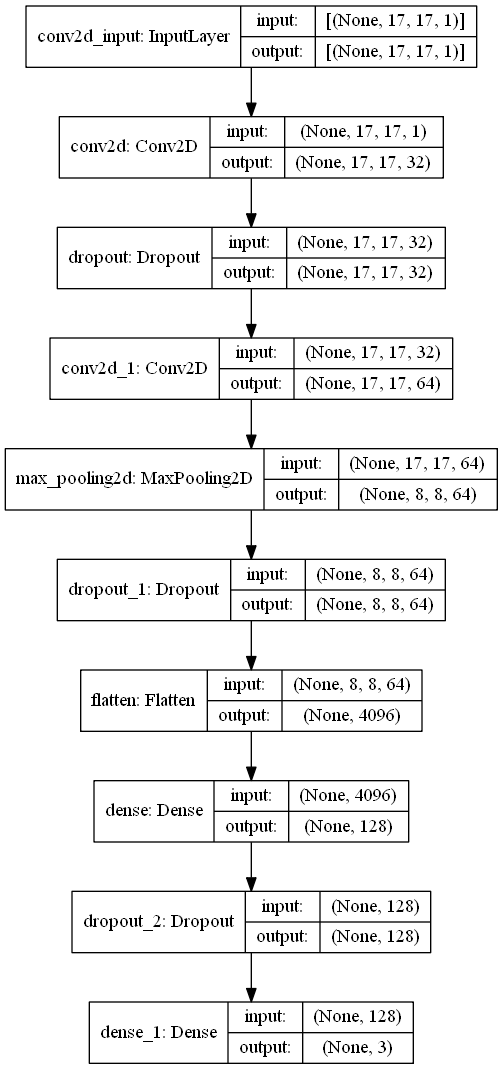

In [15]:
#РИСУЕМ МОДЕЛЬ

from IPython.display import SVG
from tensorflow.keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot

model = create_model_cnn(params)
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [29]:
#ЗАДАЕМ КОЛБЕКИ ES, RLP, MCP

import os

best_model_path = os.path.join('.', 'best_model_keras')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,
                   patience=50, min_delta=0.0001, restore_best_weights = True)
# csv_logger = CSVLogger(os.path.join(OUTPUT_PATH, 'log_training_batch.log'), append=True)
rlp = ReduceLROnPlateau(monitor='val_loss', factor=0.02, patience=20, verbose=1, mode='min',
                        min_delta=0.001, cooldown=1, min_lr=0.0001)
mcp = ModelCheckpoint(best_model_path, monitor='val_f1_metric', verbose=1,
                      save_best_only=True, save_weights_only=False, mode='max', period=1)  # val_f1_metric

#tensorboard_cbk = keras.callbacks.TensorBoard(log_dir='/logs')

In [30]:
%%time

# ЗАПУСКАЕМ МОДЕЛЬКУ С CALLBACKS

history = model.fit(x_train_i, y_train, epochs=200, verbose=1,
                            batch_size=1024, shuffle=True,  # 64--1024
                            # validation_split=0.3,
                            validation_data=(x_cv_i, y_cv),
                            callbacks=[mcp, rlp, es]
                          #  , sample_weight=sample_weights #закоментил
                   )

Train on 17954 samples, validate on 3169 samples
Epoch 1/200
17408/17954 [============================>.] - ETA: 0s - loss: 1.0279 - acc: 0.4925 - f1_metric: 0.3250
Epoch 00001: val_f1_metric improved from -inf to 0.34598, saving model to .\best_model_keras
17954/17954 [==============================] - 9s 475us/sample - loss: 1.0278 - acc: 0.4928 - f1_metric: 0.3275 - val_loss: 1.0267 - val_acc: 0.4957 - val_f1_metric: 0.3460
Epoch 2/200
17408/17954 [============================>.] - ETA: 0s - loss: 1.0262 - acc: 0.4892 - f1_metric: 0.3202
Epoch 00002: val_f1_metric improved from 0.34598 to 0.36044, saving model to .\best_model_keras
17954/17954 [==============================] - 8s 466us/sample - loss: 1.0269 - acc: 0.4885 - f1_metric: 0.3203 - val_loss: 1.0271 - val_acc: 0.4910 - val_f1_metric: 0.3604
Epoch 3/200
17408/17954 [============================>.] - ETA: 0s - loss: 1.0240 - acc: 0.4878 - f1_metric: 0.3391
Epoch 00003: val_f1_metric did not improve from 0.36044
17954/17954 

Epoch 24/200
17408/17954 [============================>.] - ETA: 0s - loss: 1.0163 - acc: 0.4914 - f1_metric: 0.3350
Epoch 00024: val_f1_metric did not improve from 0.42838
17954/17954 [==============================] - 8s 469us/sample - loss: 1.0168 - acc: 0.4909 - f1_metric: 0.3338 - val_loss: 1.0254 - val_acc: 0.4951 - val_f1_metric: 0.3584
Epoch 25/200
17408/17954 [============================>.] - ETA: 0s - loss: 1.0150 - acc: 0.4916 - f1_metric: 0.3414
Epoch 00025: val_f1_metric did not improve from 0.42838
17954/17954 [==============================] - 8s 461us/sample - loss: 1.0150 - acc: 0.4913 - f1_metric: 0.3414 - val_loss: 1.0254 - val_acc: 0.4961 - val_f1_metric: 0.3704
Epoch 26/200
17408/17954 [============================>.] - ETA: 0s - loss: 1.0138 - acc: 0.4931 - f1_metric: 0.3501
Epoch 00026: val_f1_metric did not improve from 0.42838
17954/17954 [==============================] - 8s 464us/sample - loss: 1.0142 - acc: 0.4924 - f1_metric: 0.3483 - val_loss: 1.0253 - va

Epoch 48/200
17408/17954 [============================>.] - ETA: 0s - loss: 1.0143 - acc: 0.4929 - f1_metric: 0.3515
Epoch 00048: val_f1_metric did not improve from 0.42838
17954/17954 [==============================] - 8s 455us/sample - loss: 1.0148 - acc: 0.4918 - f1_metric: 0.3502 - val_loss: 1.0258 - val_acc: 0.4935 - val_f1_metric: 0.3464
Epoch 49/200
17408/17954 [============================>.] - ETA: 0s - loss: 1.0159 - acc: 0.4921 - f1_metric: 0.3368
Epoch 00049: val_f1_metric did not improve from 0.42838
17954/17954 [==============================] - 9s 475us/sample - loss: 1.0153 - acc: 0.4928 - f1_metric: 0.3399 - val_loss: 1.0259 - val_acc: 0.4961 - val_f1_metric: 0.3432
Epoch 50/200
17408/17954 [============================>.] - ETA: 0s - loss: 1.0153 - acc: 0.4897 - f1_metric: 0.3521
Epoch 00050: val_f1_metric did not improve from 0.42838
17954/17954 [==============================] - 9s 476us/sample - loss: 1.0146 - acc: 0.4905 - f1_metric: 0.3519 - val_loss: 1.0260 - va

Epoch 72/200
17408/17954 [============================>.] - ETA: 0s - loss: 1.0157 - acc: 0.4917 - f1_metric: 0.3406
Epoch 00072: val_f1_metric did not improve from 0.42838
17954/17954 [==============================] - 8s 472us/sample - loss: 1.0151 - acc: 0.4921 - f1_metric: 0.3422 - val_loss: 1.0265 - val_acc: 0.4935 - val_f1_metric: 0.3413
Epoch 73/200
17408/17954 [============================>.] - ETA: 0s - loss: 1.0130 - acc: 0.4942 - f1_metric: 0.3485
Epoch 00073: val_f1_metric did not improve from 0.42838
Restoring model weights from the end of the best epoch.
17954/17954 [==============================] - 9s 511us/sample - loss: 1.0129 - acc: 0.4945 - f1_metric: 0.3484 - val_loss: 1.0263 - val_acc: 0.4945 - val_f1_metric: 0.3477
Epoch 00073: early stopping
Wall time: 10min 14s


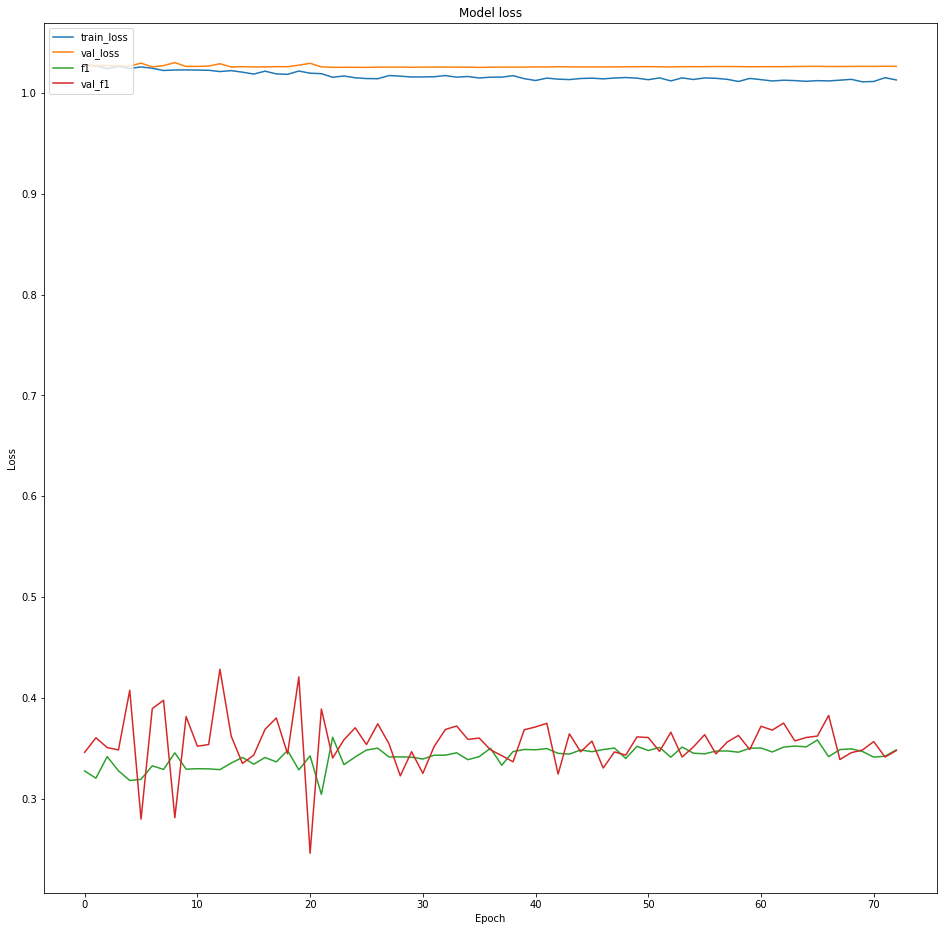

In [31]:
#НАБЛЮДАЕМ ОБУЧЕНИЕ ПО ТЕСТ И ВАЛИДАЦИИ

from matplotlib import pyplot as plt
%matplotlib inline
InteractiveShell.ast_node_interactivity = "last"

plt.figure(figsize=(16,16))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['f1_metric'])
plt.plot(history.history['val_f1_metric'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train_loss', 'val_loss', 'f1', 'val_f1'], loc='upper left')
plt.show()

In [43]:
#ВЫКАЧИВАЕМ ЛУЧШУЮ МОДЕЛЬ И СТРОИМ МЕТРИКИ

from sklearn.metrics import confusion_matrix, roc_auc_score, cohen_kappa_score
import seaborn as sns
#ЗАГРУЗИЛ
model = load_model(best_model_path)
#МЕТРИКА ЭВАЛЮЕЙТ
test_res = model.evaluate(x_test_i, y_test, verbose=1)
print("keras evaluate=", test_res)
train_res = model.evaluate(x_train_i, y_train, verbose=1)
print("keras evaluate train=", train_res)
#СПРОГНОЗИРОВАЛ
pred       = model.predict(x_test_i)
pred_train = model.predict(x_train_i)
pred_cv    = model.predict(x_cv_i)
#ПО КЛАССАМ
pred_classes       = np.argmax(pred, axis=1)
pred_classes_train = np.argmax(pred_train, axis=1)
pred_classes_cv    = np.argmax(pred_cv, axis=1)
#пПО КЛАССАМ ЛЕЙБЛЫ
y_test_classes  = np.argmax(y_test, axis=1)
y_train_classes = np.argmax(y_train, axis=1)
#check_baseline(pred_classes, y_test_classes)

#МАТРИЦЫ СМУЩЕНЫЕ
print('test')
conf_mat  = confusion_matrix(y_test_classes,  pred_classes)
c_m_train = confusion_matrix(y_train_classes, pred_classes_train)
print(conf_mat)
labels = [0,1,2]
print('train')

print(c_m_train)

f1_weighted = f1_score(y_test_classes, pred_classes, labels=None, 
         average='weighted', sample_weight=None)
print("F1 score (weighted)", f1_weighted)
print("F1 score (macro)", f1_score(y_test_classes, pred_classes, labels=None, 
         average='macro', sample_weight=None))
print("F1 score (micro)", f1_score(y_test_classes, pred_classes, labels=None, 
         average='micro', sample_weight=None))  # weighted and micro preferred in case of imbalance

# https://scikit-learn.org/stable/modules/model_evaluation.html#cohen-s-kappa --> supports multiclass; ref: https://stats.stackexchange.com/questions/82162/cohens-kappa-in-plain-english
print("cohen's Kappa", cohen_kappa_score(y_test_classes, pred_classes))

recall = []
for i, row in enumerate(conf_mat):
    recall.append(np.round(row[i]/np.sum(row), 2))
    print("Recall of class {} = {}".format(i, recall[i]))
print("Recall avg", sum(recall)/len(recall))

2352/2352 [==============================] - 0s 211us/sample - loss: 0.9644 - acc: 0.5761 - f1_metric: 0.4957
keras evaluate= [0.9643637071661397, 0.5761054, 0.49567986]
17954/17954 [==============================] - 3s 152us/sample - loss: 1.0108 - acc: 0.5014 - f1_metric: 0.4266
keras evaluate train= [1.0107892506954146, 0.50144815, 0.4266278]
test
[[1283   33    8]
 [ 473   58   10]
 [ 418   55   14]]
train
[[7811  476   88]
 [3800  882  231]
 [3663  693  310]]
F1 score (weighted) 0.46294967150985966
F1 score (macro) 0.31878733729663933
F1 score (micro) 0.5761054421768708
cohen's Kappa 0.0836332601004004
Recall of class 0 = 0.97
Recall of class 1 = 0.11
Recall of class 2 = 0.03
Recall avg 0.37000000000000005


In [134]:
result2

,hold_f,buy_f,sell_f,label,return_,result,forec50,forec
0,0.453066,0.258124,0.288810,0,-0.697232,1,0,2298
1,0.667440,0.151225,0.181335,0,0.376502,1,0,2298
2,0.573518,0.239524,0.186957,2,-1.109023,0,0,2298
3,0.412290,0.328660,0.259050,2,-2.252582,0,0,2298
4,0.517003,0.236876,0.246121,2,-2.135540,0,0,2298
...,...,...,...,...,...,...,...,...
3164,0.519136,0.250748,0.230116,2,-1.703674,0,0,2298
3165,0.548533,0.219117,0.232350,0,-0.864382,1,0,2298
3166,0.438689,0.294267,0.267044,0,0.628512,1,0,2298
3167,0.581695,0.207632,0.210673,0,-0.374444,1,0,2298


In [138]:
k=10 #УБИРАЕМ БОЛЬШИЕ%

#БЕРЕМ ЗА ЦИКЛ ПО 1 ИЗ ЛИСТА С ПОМОЩЬЮ ЗИП
y1 = [pred,  pred_train,pred_cv]
x1 = [y_test,y_train,y_cv]
z1 = [x_test,x_train,x_cv]
q1 = ['test','train','cv']

for (y,x,z,q) in zip(y1,x1,z1,q1):
    print(q)
    result1= pd.DataFrame()
    result1 = pd.concat([pd.DataFrame(y), pd.DataFrame(np.argmax(x, axis=1)), pd.DataFrame(np.array(z.copy()[2]))], axis=1) ##БЕРЕМ ПРОГНОЗ 3* БЕРЕМ МЕТКУ 1* И %
    result1.columns = ['hold_f', 'buy_f', 'sell_f', 'label', 'return_']
    result1['result'] = np.where(np.argmax(y, axis=1)==result1['label'], 1,0)
    result1['result'].mean()

        #ПОРОГ ДЛЯ УВЕРЕННОСТЬ ПРОГНОЗА
    result1['forec50'] = np.where(result1['buy_f']>0.5, 1, np.where(result1['sell_f']>0.50,2,0))
        #БЕЗ ПОРОГА ДЛЯ УВЕРЕННОСТЬ ПРОГНОЗА
    result1['forec']   = np.argmax(y, axis=1)
        #УБРАЛ%
    result2 = result1[(result1['return_']<=k)&(result1['return_']>=-k)]
        #СВОДНАЯ
    display(pd.pivot_table(result2, index='forec', values='return_', aggfunc=['count', 'mean']))
    #С ПОРОГОМ
    #display(pd.pivot_table(result2, index='forec50', values='return_', aggfunc=['count', 'mean']))
#result1

test


0.5761054421768708

,count,mean
,return_,return_
forec,,
0,2164,0.056755
1,144,-0.110379
2,28,0.151742


train


0.5014481452601092

,count,mean
,return_,return_
forec,,
0,15266,0.025630
1,2014,0.306786
2,535,-0.676834


cv


0.4976333228147681

,count,mean
,return_,return_
forec,,
0,2698,0.033530
1,358,0.201831
2,91,-0.618241


In [ ]:
pred_df.to_excel('SMART.xlsx')

In [139]:
from data_generator import *

ModuleNotFoundError: No module named 'data_generator'